# Code for visualisations in blog

##  1. Install packages and notes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For all of the code below - any part where there is a RED coloured text needs to be changed to the pathname where the code is saved on YOUR computer. 
"/Users/kaitlinjohnson/Desktop/" this part is unique - so you only really need to change this bit if you would like to replicate the code.

## 2. Visualisations

### Section 1: Macro perspective of luxury goods during Covid for the USA

#### 2.1.1 Create luxury good dataframe and clean data for graph

In [2]:
# Read full luxury goods dataset with various measures included from 2018-2029 (predictions)
df_luxgoods_US = pd.read_csv('/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/lux_goods_US_revenue.csv', skiprows=1)
df_luxgoods_US.head()

,Region,Market,Chart,Name,Unit,Source,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,United States,Luxury Leather Goods,Revenue,Total,USD (US$),Statista Market Insights,"11,060,532,359.955","12,130,107,426.044","10,146,228,676.659","11,754,440,260.56","12,558,846,898.03","14,828,605,751.052","16,186,759,446.429","17,863,829,316.985","19,524,128,488.837","21,167,824,668.969","22,795,083,887.3","24,406,070,513.448"
1,United States,Luxury Leather Goods,Revenue Change,Total,percent,Statista Market Insights,0,0.097,-0.164,0.159,0.068,0.181,0.092,0.104,0.093,0.084,0.077,0.071
2,United States,Luxury Leather Goods,Average Revenue per Capita,Total,USD (US$),Statista Market Insights,33.301,36.283,30.202,34.88,37.125,43.614,47.355,51.99,56.532,60.985,65.352,69.633
3,United States,Luxury Leather Goods,Company Shares,LVMH,percent,Statista Market Insights,0,0,0,0,0,0.418,0,0,0,0,0,0
4,United States,Luxury Leather Goods,Company Shares,Tapestry,percent,Statista Market Insights,0,0,0,0,0,0.12,0,0,0,0,0,0


In [3]:
# The dataframe above includes cosmetics, skincare and fragrances combined
# This project needs these to be split 
# Import data separately for each category from a different dataset
df_luxcosfrag_US_full = pd.read_csv('/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/US_cos_frag_skin.csv')

# Filter to get rid of the "total" (cos + skin + frag) row (not needed for graph)
df_luxcosfrag_US = df_luxcosfrag_US_full.iloc[1:4]

# Rename in preparation for merge 
df_luxcosfrag_US = df_luxcosfrag_US.rename(columns={'Unnamed: 0' : 'Market'})

# Filter for covid dates - too many years would be too clutered.
# 2019 = pre-pandemic (base level), 2020 = during pandemic change, and 2021 = rebound
df_luxcosfrag_US = df_luxcosfrag_US.drop(columns=['2018', '2022', '2023', '2024', '2025','2026','2027','2028','2029'])
df_luxcosfrag_US[['2019','2020','2021']] = df_luxcosfrag_US[['2019','2020','2021']]*1000000000

# Print dataframe
df_luxcosfrag_US

,Market,2019,2020,2021
1,Prestige Skin Care,3.620000e+09,3.110000e+09,3.330000e+09
2,Prestige Fragrances,3.570000e+09,2.900000e+09,3.140000e+09
3,Prestige Cosmetics,3.940000e+09,3.450000e+09,3.730000e+09


In [4]:
# Filter the dataframe for just Revenue (not interested in other measures)
df_luxgoods_US_filtered = df_luxgoods_US[df_luxgoods_US["Chart"] == "Revenue"]

# Filter for only total revenue of USA (not interested in other countries/brands)
df_luxgoods_US_filtered = df_luxgoods_US_filtered[df_luxgoods_US_filtered["Name"]=="Total"]

# Drop all other columns to create same format as above
df_luxgoods_US_filtered = df_luxgoods_US_filtered.drop(columns=['Region', 'Chart', 'Name', 'Unit', 'Source', '2018', '2022', '2023', '2024', '2025','2026','2027','2028','2029'])
df_luxgoods_US_filtered

,Market,2019,2020,2021
0,Luxury Leather Goods,"12,130,107,426.044","10,146,228,676.659","11,754,440,260.56"
171,Luxury Watches & Jewelry,"17,786,008,870.76","14,661,407,923.848","16,442,476,032.358"
345,Luxury Fashion,"30,993,996,120.716","27,713,460,330.501","28,734,741,926.935"
518,Luxury Eyewear,"9,600,588,003.752","7,928,284,844.069","8,449,274,267.786"
679,Prestige Cosmetics & Fragrances,"11,128,087,085.608","9,460,812,647.317","10,198,173,508.067"


In [5]:
# Merge the two dataframes using concat as they are in the same format
merged_market_df = pd.concat([df_luxcosfrag_US, df_luxgoods_US_filtered], ignore_index=True)

# Drop the joint cos frag skin row as we have separated them now
merged_market_df = merged_market_df.drop(7)
merged_market_df.head()

,Market,2019,2020,2021
0,Prestige Skin Care,3620000000.0,3110000000.0,3330000000.0
1,Prestige Fragrances,3570000000.0,2900000000.0,3140000000.0
2,Prestige Cosmetics,3940000000.0,3450000000.0,3730000000.0
3,Luxury Leather Goods,"12,130,107,426.044","10,146,228,676.659","11,754,440,260.56"
4,Luxury Watches & Jewelry,"17,786,008,870.76","14,661,407,923.848","16,442,476,032.358"


#### 2.1.2 Code visualisation for luxury goods before, during and after covid-19 

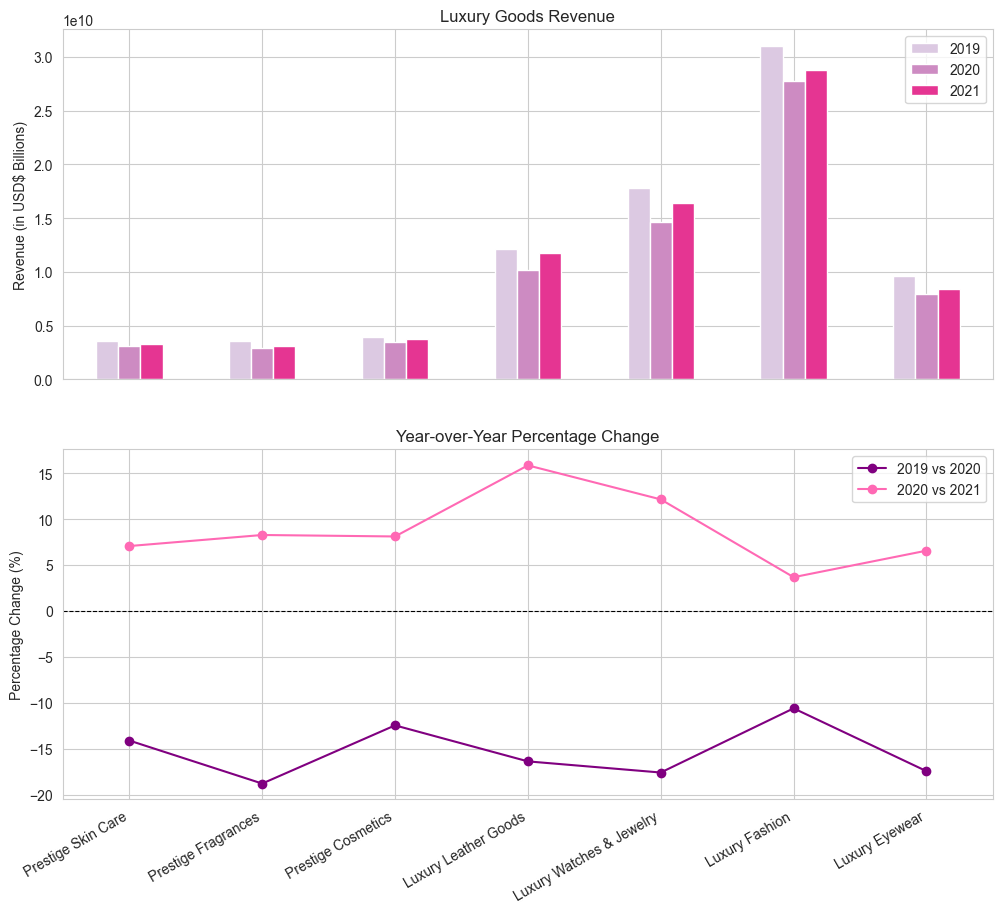

In [6]:
# Selected colour scheme for project - pinks and purples fit the theme 
colors = sns.color_palette("PuRd", n_colors=4)
sns.set_palette(colors)

# Added grid as it made it easier to read
sns.set_style("whitegrid")

# Get rid of , in numbers to get in right format for graph
for year in ['2019', '2020', '2021']:
    merged_market_df[year] = merged_market_df[year].replace({',': ''}, regex=True).astype(float)

# Calculate percentage change in revenue
merged_market_df['Change 2019-2020'] = (merged_market_df['2020'] - merged_market_df['2019']) / merged_market_df['2019'] * 100
merged_market_df['Change 2020-2021'] = (merged_market_df['2021'] - merged_market_df['2020']) / merged_market_df['2020'] * 100

# Create the axis to plot two graphs 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot bar chart on axis one and add labels
merged_market_df.set_index('Market')[['2019', '2020', '2021']].plot(kind='bar', ax=ax1)
ax1.set_ylabel('Revenue (in USD$ Billions)')
ax1.set_title('Luxury Goods Revenue')

# Plot line graph showing percentage change
ax2.plot(merged_market_df['Market'], merged_market_df['Change 2019-2020'], label='2019 vs 2020', marker='o', color='purple')
ax2.plot(merged_market_df['Market'], merged_market_df['Change 2020-2021'], label='2020 vs 2021', marker='o', color='hotpink')
ax2.set_ylabel('Percentage Change (%)')
ax2.set_title('Year-over-Year Percentage Change')
ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)
ax2.legend()

# Rotate labels to read and show
plt.xticks(rotation=30, ha='right')
plt.show()

### Section 2: Cosmetics and the lipstick index during covid in the USA

#### 2.2.1 Create luxury cosmetic dataframe separated by category and clean

In [7]:
# Load dataset for luxury cosmetics revenue split by product
df_luxcos_segments = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/segmented_luxcos_revenue.csv")

# Filter for only recorded years (not predictions)
df_luxcos_segments_filtered = df_luxcos_segments[['Unnamed: 0','2018','2019','2020','2021','2022','2023','2024']]

# Get rid of total
df_luxcos_segments_filtered = df_luxcos_segments_filtered.iloc[1:4]

# Rename columns
df_luxcos_segments_filtered = df_luxcos_segments_filtered.rename(columns={'Unnamed: 0' : 'Cosmetic_product'})
df_luxcos_segments_filtered

,Cosmetic_product,2018,2019,2020,2021,2022,2023,2024
1,Prestige Eyes Cosmetics,0.81,0.82,1.01,0.96,0.83,0.84,0.89
2,Prestige Face Cosmetics,2.06,2.18,1.86,2.10,2.38,2.42,2.54
3,Prestige Lips Cosmetics,0.89,0.94,0.59,0.67,0.96,0.97,1.02


In [8]:
# reset index and show table
df_luxcos_segments_filtered.set_index('Cosmetic_product', inplace=True)
df_luxcos_segments_filtered

,2018,2019,2020,2021,2022,2023,2024
Cosmetic_product,,,,,,,
Prestige Eyes Cosmetics,0.81,0.82,1.01,0.96,0.83,0.84,0.89
Prestige Face Cosmetics,2.06,2.18,1.86,2.10,2.38,2.42,2.54
Prestige Lips Cosmetics,0.89,0.94,0.59,0.67,0.96,0.97,1.02


#### 2.2.2 Create line graph for prestige eyes, lips and face over time

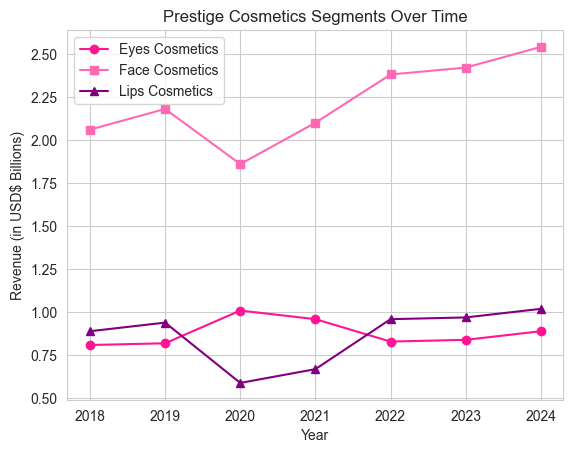

In [9]:
# Create plot for each product type
plt.plot(df_luxcos_segments_filtered.columns, df_luxcos_segments_filtered.loc['Prestige Eyes Cosmetics'], label='Eyes Cosmetics', color='deeppink', marker='o')
plt.plot(df_luxcos_segments_filtered.columns, df_luxcos_segments_filtered.loc['Prestige Face Cosmetics'], label='Face Cosmetics', color='hotpink', marker='s')
plt.plot(df_luxcos_segments_filtered.columns, df_luxcos_segments_filtered.loc['Prestige Lips Cosmetics'], label='Lips Cosmetics', color='purple', marker='^')

# Add legend and labels
plt.legend()
plt.title('Prestige Cosmetics Segments Over Time')
plt.xlabel('Year')
plt.ylabel('Revenue (in USD$ Billions)')
plt.grid(True)

# Show plot
plt.show()

#### 2.2.3 Dataframe and clean for prestige cosmetics and overall US cosmetics

In [10]:
# Create a dataset for the revenue of prestige comsetics in US 

# Use same dataset created for visualisation 1
df_luxcosfrag_US_full

# Filter for just prestige cosmetcis
df_prestige_cosmetics = df_luxcosfrag_US_full[df_luxcosfrag_US_full["Unnamed: 0"] == "Prestige Cosmetics"]
df_prestige_cosmetics = df_prestige_cosmetics.drop(columns=['Unnamed: 0'])

# Reshape and reset index
dft_prestige_cosmetics = df_prestige_cosmetics.transpose()
dft_prestige_cosmetics.reset_index(inplace=True)

# Rename columns
dft_prestige_cosmetics.columns = ['Year', 'Prestige Cosmetics Revenue']

# Show dataframe
dft_prestige_cosmetics.head()

,Year,Prestige Cosmetics Revenue
0,2018,3.76
1,2019,3.94
2,2020,3.45
3,2021,3.73
4,2022,4.16


In [11]:
# Dataframe for the total cosmetic market revenue  in the US

# Read in dataset
df_cosmetics_market = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/cosmetic_revenue_US.csv")
df_cosmetics_market.head()

,Revenue of the cosmetics industry in the U.S. 2019-2030,Unnamed: 1
0,Revenue of the cosmetics market in the United ...,NaN
1,NaN,NaN
2,2019,17.03
3,2020,13.64
4,2021,14.77


In [12]:
# Rename columns
df_cosmetics_market = df_cosmetics_market.rename(columns={'Unnamed: 1' : 'Revenue mass market', 'Revenue of the cosmetics industry in the U.S. 2019-2030' : 'Year'})

# Skip the 2 NaN value rows
df_cosmetics_market = df_cosmetics_market.iloc[2:]

# Show dataframe
df_cosmetics_market.head()

,Year,Revenue mass market
2,2019,17.03
3,2020,13.64
4,2021,14.77
5,2022,18.01
6,2023,19.43


In [13]:
# Merge the revenue of the mass market and the prestige market
merged_cos_df = pd.merge(df_cosmetics_market, dft_prestige_cosmetics, on="Year", how="inner")

# Convert to integer
merged_cos_df["Year"] = merged_cos_df["Year"].astype(int)

# Filter for 2019-2023
merged_cos_df = merged_cos_df[merged_cos_df["Year"] < 2024]

# Show dataframe
merged_cos_df.head()

,Year,Revenue mass market,Prestige Cosmetics Revenue
0,2019,17.03,3.94
1,2020,13.64,3.45
2,2021,14.77,3.73
3,2022,18.01,4.16
4,2023,19.43,4.24


#### 2.2.4 Indexed graph for prestige cosmetics and cosmetics market overall

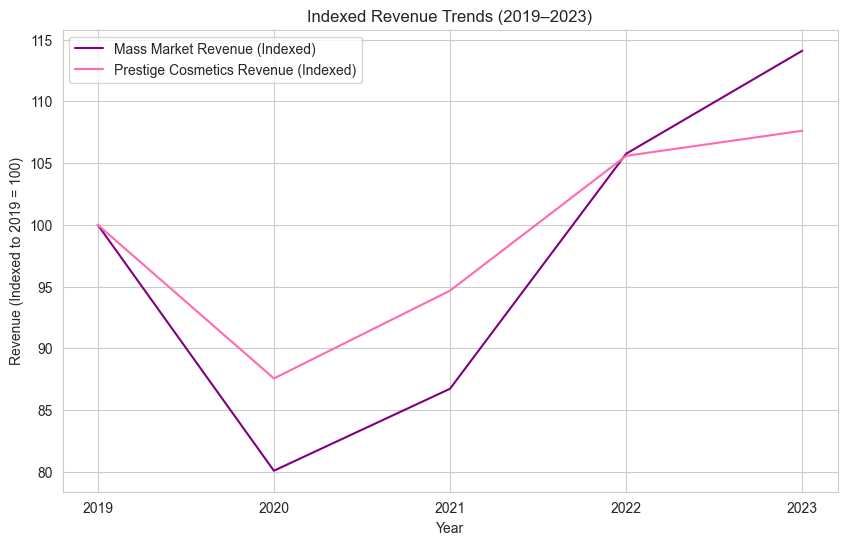

In [14]:
# Create copy of the above dataframe incase of mistakes
df_indexed = merged_cos_df.copy()

# Create in index where the first row (2019) is the baseline of 100, each value divided by this x 100
df_indexed['Revenue mass market'] = merged_cos_df['Revenue mass market'] / merged_cos_df['Revenue mass market'].iloc[0] * 100
df_indexed['Prestige Cosmetics Revenue'] = merged_cos_df['Prestige Cosmetics Revenue'] / merged_cos_df['Prestige Cosmetics Revenue'].iloc[0] * 100

# Create figure for indexed graph
plt.figure(figsize=(10, 6))

# Plot line for each (mass and prestige) using year and indexed values
plt.plot(merged_cos_df['Year'], df_indexed['Revenue mass market'], label='Mass Market Revenue (Indexed)', color="purple")
plt.plot(merged_cos_df['Year'], df_indexed['Prestige Cosmetics Revenue'], label='Prestige Cosmetics Revenue (Indexed)', color="hotpink")

# Add labels and legends
plt.xticks(merged_cos_df["Year"])
plt.xlabel('Year')
plt.ylabel('Revenue (Indexed to 2019 = 100)')
plt.title('Indexed Revenue Trends (2019–2023)')
plt.legend()
plt.grid(True)

# Show graph
plt.show()


## 3. Advanced modelling analysis 

This section is really long. I was going to separate the code into two with this part separate, however there is a lot of overlap with various dataframes run from above. To make sure this works - ensure everything above is run successfully to use the dataframes from previous parts. I begin with the USA. Initially, I attempted to advance model with just prestige cosmetics from the USA. I quickly realised this was not enough data. As a result, I used data from UK, Japan, China and Germany - the other largest consumers of luxury goods worldwide. A lot of the formatting for each of the countries is very similar so may not be worth reading through every part as there will be repetition. Most the data collected was already in US dollars, netherless some exchange rates may have been added in the code if it was not in the correct currency. 

### 3.1 Data cleaning for the USA

#### 3.1.1 USA Revenue column

In [15]:
# USA revenue
#  Create the USA dataframe - starting with revenue column
df_USA = df_luxcos_segments_filtered.copy()

# Reset the index and check the column names
df_USA.reset_index(inplace=True)

# Melt the DataFrame, using 'Cosmetic_product' as the id variable
df_USA = df_USA.melt(id_vars=['Cosmetic_product'], var_name='Year', value_name='Revenue')

# Revenue in billions and year converted
df_USA['Revenue'] = df_USA['Revenue']* 1000000000
df_USA ['Year']= df_USA['Year'].astype(int)

# Show dataframe
df_USA.head()

,Cosmetic_product,Year,Revenue
0,Prestige Eyes Cosmetics,2018,8.100000e+08
1,Prestige Face Cosmetics,2018,2.060000e+09
2,Prestige Lips Cosmetics,2018,8.900000e+08
3,Prestige Eyes Cosmetics,2019,8.200000e+08
4,Prestige Face Cosmetics,2019,2.180000e+09


#### 3.1.2 USA GDP column

In [16]:
# Import USA GDP dataset
GDP_data = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/Global_GDP.csv", skiprows=4)
GDP_data

# Reshape and index to get just countries and data
GDP_data.columns = GDP_data.loc[0]  
GDP_data = GDP_data.drop(index=0)  
GDP_data = GDP_data.reset_index(drop=True)

# Drop columns so it is just country name and years
GDP_data_cleaned = GDP_data.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code'])

# Melt the data to long format, keeping 'Country Name' and 'GDP' for each year
GDP_data_long = GDP_data_cleaned.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP')

# Convert the Year column to integer and GDP to numeric
GDP_data_long['Year'] = GDP_data_long['Year'].astype(float)
GDP_data_long['GDP'] = pd.to_numeric(GDP_data_long['GDP'], errors='coerce')

# Drop rows where GDP is NaN
GDP_data_long = GDP_data_long.dropna(subset=['GDP'])

# Filter for the USA and years 2018-2022
USA_data = GDP_data_long[(GDP_data_long['Country Name'] == 'United States')&
                          (GDP_data_long['Year'] >= 2018) & 
                          (GDP_data_long['Year'] <= 2023)]

USA_data['Year'] = USA_data['Year'].astype(int)
USA_data = USA_data.drop(columns=['Country Name'])

# Reset the index after filtering
USA_data = USA_data.reset_index(drop=True)
USA_data

/var/folders/tq/_jp_jlsx7g1_22mq8kmlfnxw0000gn/T/ipykernel_15904/833325064.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USA_data['Year'] = USA_data['Year'].astype(int)


,Year,GDP
0,2018,2.065652e+13
1,2019,2.153998e+13
2,2020,2.135410e+13
3,2021,2.368117e+13
4,2022,2.600689e+13
5,2023,2.772071e+13


#### 3.1.3 Consumer confidence USA column

In [17]:
# Import dataset on USA consumer confidence
consumer_confidence = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/consumer_sentiment_US.csv")
consumer_confidence

# Rename columns and drop NA
consumer_confidence.columns = ["Month", "CCI"]
consumer_confidence = consumer_confidence.dropna()

# Creat function to convert from format Jan '19 to 2019
def extract_year(month_str):
    year_suffix = month_str.split("'")[-1]
    return 2000 + int(year_suffix)

# Insert function to run through the month column and change all format
consumer_confidence['Year'] = consumer_confidence['Month'].apply(extract_year)
consumer_confidence

# Convert to numeric
consumer_confidence['CCI'] = pd.to_numeric(consumer_confidence['CCI'], errors='coerce')

# Reformat to get rid of the month column and create an annual average confidence level
cci_by_year = consumer_confidence.groupby('Year')['CCI'].mean().reset_index()
cci_by_year.columns = ['Year', 'Avg_Confidence']

# Show dataframe
cci_by_year.head()

,Year,Avg_Confidence
0,2019,101.251667
1,2020,99.486667
2,2021,99.056667
3,2022,96.884167
4,2023,97.620833


#### 3.1.4 Unemployment rate in USA column

In [18]:
# Import dataset on unemployment rate 
unemployment_rate = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/US_unemployment_rate.csv")

# Skip first two rows
unemployment_rate = unemployment_rate.iloc[2:]

# rename columns
unemployment_rate.columns = ['Year', 'Unemployment_rate', 'Unit']

# Drop column which has "in %" for every row
unemployment_rate.drop(columns=['Unit'], inplace=True)

# Convert year and convert from format '90 to 1990 etc.
unemployment_rate["Year"] = unemployment_rate["Year"].str.replace("'", "").astype(int)
unemployment_rate["Year"] = unemployment_rate["Year"].apply(lambda x: x + 2000 if x < 25 else x + 1900)

# Show dataframe
unemployment_rate.head()



,Year,Unemployment_rate
2,1990,5.6
3,1991,6.8
4,1992,7.5
5,1993,6.9
6,1994,6.1


#### 3.1.5 E-commerce by cosmetic product USA column

In [19]:
# Create column of online sales share for each prestige cosmetic product in the USA 

# LIPS 
# Read csv and melt into different shape
lips_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/lips_online_sales.csv")
lips_ecommerce = pd.melt(lips_ecommerce, id_vars=["Unnamed: 0"], var_name = "Year", value_name = "Online_revenue_percent")

# Filter for just the 'Online' rows and drop column
lips_online = lips_ecommerce[lips_ecommerce['Unnamed: 0'] == 'Online']
lips_online = lips_online.drop(columns=['Unnamed: 0'])

# Convert the 'Year' column to integers (ready for merge)
lips_online['Year'] = lips_online['Year'].astype(int)
lips_online

# EYES 
# Read csv and melt into different shape
eyes_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/eyes_ecommerce.csv")
eyes_ecommerce = pd.melt(eyes_ecommerce, id_vars=["Unnamed: 0"], var_name = "Year", value_name = "Online_revenue_percent")

# Filter for just the 'Online' rows and drop column
eyes_online = eyes_ecommerce[eyes_ecommerce['Unnamed: 0'] == 'Online']
eyes_online = eyes_online.drop(columns=['Unnamed: 0'])

# Convert the 'Year' column to integers (ready for merge)
eyes_online['Year'] = eyes_online['Year'].astype(int)
eyes_online

# FACE 
# Read csv and melt into different shape
face_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/face_ecommerce.csv")
face_ecommerce = pd.melt(face_ecommerce, id_vars=["Unnamed: 0"], var_name = "Year", value_name = "Online_revenue_percent")

# Filter for just the 'Online' rows and drop column
face_online = face_ecommerce[face_ecommerce['Unnamed: 0'] == 'Online']
face_online = face_online.drop(columns=['Unnamed: 0'])

# Convert the 'Year' column to integers (ready for merge)
face_online['Year'] = face_online['Year'].astype(int)
face_online


,Year,Online_revenue_percent
1,2018,0.7
3,2019,0.7
5,2020,1.0
7,2021,1.0
9,2022,0.9
11,2023,0.9
13,2024,0.8
15,2025,0.7
17,2026,0.6
19,2027,0.6


#### 3.1.5 Create USA dataframe

In [20]:
# Merge GDP, consumer confidence and unemployment rate
df_USA = pd.merge(df_USA, USA_data, on='Year', how="inner")
df_USA = pd.merge(df_USA, cci_by_year, on='Year', how="inner")
df_USA = pd.merge(df_USA, unemployment_rate, on='Year', how="inner")
df_USA.head()


,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate
0,Prestige Eyes Cosmetics,2019,8.200000e+08,2.153998e+13,101.251667,3.7
1,Prestige Face Cosmetics,2019,2.180000e+09,2.153998e+13,101.251667,3.7
2,Prestige Lips Cosmetics,2019,9.400000e+08,2.153998e+13,101.251667,3.7
3,Prestige Eyes Cosmetics,2020,1.010000e+09,2.135410e+13,99.486667,8.1
4,Prestige Face Cosmetics,2020,1.860000e+09,2.135410e+13,99.486667,8.1


In [21]:
# Filter the main DataFrame for each product type (Lips, Eyes, Face)
df_lips = df_USA[df_USA['Cosmetic_product'] == 'Prestige Lips Cosmetics']
df_eyes = df_USA[df_USA['Cosmetic_product'] == 'Prestige Eyes Cosmetics']
df_face = df_USA[df_USA['Cosmetic_product'] == 'Prestige Face Cosmetics']

# Merge online sales data for each product type
df_lips = pd.merge(df_lips, lips_online, on="Year", how="left")
df_eyes = pd.merge(df_eyes, eyes_online, on="Year", how="left")
df_face = pd.merge(df_face, face_online, on="Year", how="left")

# Rename the online sales column
df_lips = df_lips.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_eyes = df_eyes.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_face = df_face.rename(columns={'Online_revenue_percent': 'online_sales_%'})

In [22]:
# Merge again
df_USA = pd.concat([df_lips, df_eyes, df_face])

# Add column for USA
df_USA["Country"] = "USA"

# Show dataframe
df_USA.head()

,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate,online_sales_%,Country
0,Prestige Lips Cosmetics,2019,940000000.0,2.153998e+13,101.251667,3.7,16.7,USA
1,Prestige Lips Cosmetics,2020,590000000.0,2.135410e+13,99.486667,8.1,31.5,USA
2,Prestige Lips Cosmetics,2021,670000000.0,2.368117e+13,99.056667,5.3,35.7,USA
3,Prestige Lips Cosmetics,2022,960000000.0,2.600689e+13,96.884167,3.6,29.5,USA
4,Prestige Lips Cosmetics,2023,970000000.0,2.772071e+13,97.620833,3.6,35.6,USA


### 3.2 Data cleaning for other countries (China, Germany, Japan and UK)

#### 3.2.1 China

In [23]:
# CHINA REVENUE 

# Read data set for china prestige cosmetics revenue
china_revenue = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/China/china_revenue.csv")

# Filter and rename columns and rows
china_revenue = china_revenue[['Unnamed: 0','2018','2019','2020','2021','2022','2023','2024']]
china_revenue = china_revenue.iloc[1:4]
china_revenue = china_revenue.rename(columns={'Unnamed: 0' : 'Cosmetic_product'})
china_revenue

# Create china dataframe
china_df = china_revenue.copy()

# Melt the DataFrame, using 'Cosmetic_product' as the id variable
china_df = china_df.melt(id_vars=['Cosmetic_product'], var_name='Year', value_name='Revenue')
china_df['Revenue'] = china_df['Revenue']* 1000000000
china_df['Year'] = china_df['Year'].astype(int)

china_df.head()

,Cosmetic_product,Year,Revenue
0,Prestige Face Cosmetics,2018,6.300000e+08
1,Prestige Eyes Cosmetics,2018,5.400000e+08
2,Prestige Lips Cosmetics,2018,1.120000e+09
3,Prestige Face Cosmetics,2019,7.900000e+08
4,Prestige Eyes Cosmetics,2019,6.600000e+08


In [24]:
# CHINA GDP 

# Using same dataset as USA GDP, filter for china and 2018-2023
china_GDP = GDP_data_long[(GDP_data_long['Country Name'] == 'China')&
                          (GDP_data_long['Year'] >= 2018) & 
                          (GDP_data_long['Year'] <= 2023)]

# Convert year, drop columns and reset index
china_GDP['Year'] = china_GDP['Year'].astype(int)
china_GDP= china_GDP.drop(columns=['Country Name'])
china_GDP = china_GDP.reset_index(drop=True)
china_GDP.head()

/var/folders/tq/_jp_jlsx7g1_22mq8kmlfnxw0000gn/T/ipykernel_15904/3436559386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_GDP['Year'] = china_GDP['Year'].astype(int)


,Year,GDP
0,2018,1.389491e+13
1,2019,1.427997e+13
2,2020,1.468774e+13
3,2021,1.782046e+13
4,2022,1.788178e+13


In [25]:
# CHINA CONFIDENCE 

# Import dataset on consumer confidence
china_confidence = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/China/china_cci.csv")

# Convert to year and filter for 2018-2023
china_confidence['Year'] = pd.to_datetime(china_confidence['observation_date']).dt.year
china_confidence = china_confidence[(china_confidence['Year'] >= 2018) & (china_confidence['Year'] <= 2023)]

# Group to find annual average
china_confidence_avg = china_confidence.groupby('Year')['CSCICP02CNM460S'].mean().reset_index()

# Rename column for merge later
china_confidence_avg = china_confidence_avg.rename(columns={'CSCICP02CNM460S': 'Avg_Confidence'})
china_confidence_avg


,Year,Avg_Confidence
0,2018,121.141667
1,2019,124.566667
2,2020,119.516667
3,2021,121.175000
4,2022,95.025000
5,2023,88.758333


In [26]:
# CHINA UNEMPLOYMENT 

# Import dataset
china_unemployment = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/China/china_unemployment.csv")

# Change columns, drop na values and unit column, and convert values
china_unemployment.columns = ["Year", "Unemployment_rate", "Percent"]
china_unemployment = china_unemployment.dropna(subset=['Unemployment_rate'])
china_unemployment = china_unemployment.drop(columns=['Percent'])
china_unemployment = china_unemployment[~china_unemployment['Year'].str.contains('\*')]
china_unemployment['Year'] = china_unemployment['Year'].astype(int)

# filter for 2018-2023
china_unemployment = china_unemployment[(china_unemployment['Year'] >= 2018) & (china_unemployment['Year'] <= 2023)]
china_unemployment


,Year,Unemployment_rate
3,2018,4.93
4,2019,5.15
5,2020,5.62
6,2021,5.12
7,2022,5.58
8,2023,5.22


In [27]:
# CHINA MERGED
china_df = pd.merge(china_df, china_GDP, on='Year', how="inner")
china_df = pd.merge(china_df, china_confidence_avg, on='Year', how="inner")
china_df = pd.merge(china_df, china_unemployment, on='Year', how="inner")


In [28]:
# CHINA ECOMMERCE 
# Import Lips dataset and reshape
china_lips_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/China/china_lips_onoff.csv")
china_lips_ecommerce = pd.melt(china_lips_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just the 'Online' rows, drop columns and change format
china_lips_online = china_lips_ecommerce[china_lips_ecommerce['Unnamed: 0'] == 'Online']
china_lips_online = china_lips_online.drop(columns=['Unnamed: 0'])
china_lips_online['Year'] = china_lips_online['Year'].astype(int)
china_lips_online

# Import Eyes dataset and reshape
china_eyes_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/China/china_eyes_onoff.csv")
china_eyes_ecommerce = pd.melt(china_eyes_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just the 'Online' rows, drop columns and change format
china_eyes_online = china_eyes_ecommerce[china_eyes_ecommerce['Unnamed: 0'] == 'Online']
china_eyes_online = china_eyes_online.drop(columns=['Unnamed: 0'])
china_eyes_online['Year'] = china_eyes_online['Year'].astype(int)
china_eyes_online

# Import Lips dataset and reshape
china_face_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/China/china_face_onoff.csv")
china_face_ecommerce = pd.melt(china_face_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just the 'Online' rows, drop columns and change format
china_face_online = china_face_ecommerce[china_face_ecommerce['Unnamed: 0'] == 'Online']
china_face_online = china_face_online.drop(columns=['Unnamed: 0'])
china_face_online['Year'] = china_face_online['Year'].astype(int)
china_face_online



,Year,Online_revenue_percent
1,2018,13.9
3,2019,13.2
5,2020,17.3
7,2021,17.0
9,2022,14.2
11,2023,13.0
13,2024,12.1
15,2025,13.2
17,2026,13.4
19,2027,13.6


In [29]:
# CHINA FINAL DATAFRAME
# Filter the main DataFrame for each product type (Lips, Eyes, Face)
df_lips_china = china_df[china_df['Cosmetic_product'] == 'Prestige Lips Cosmetics']
df_eyes_china = china_df[china_df['Cosmetic_product'] == 'Prestige Eyes Cosmetics']
df_face_china = china_df[china_df['Cosmetic_product'] == 'Prestige Face Cosmetics']

# Merge online sales data for each product type
df_lips_china = pd.merge(df_lips_china, china_lips_online, on="Year", how="left")
df_eyes_china = pd.merge(df_eyes_china, china_eyes_online, on="Year", how="left")
df_face_china = pd.merge(df_face_china, china_face_online, on="Year", how="left")

# Rename the online sales column
df_lips_china = df_lips_china.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_eyes_china = df_eyes_china.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_face_china = df_face_china.rename(columns={'Online_revenue_percent': 'online_sales_%'})

china_df = pd.concat([df_lips_china, df_eyes_china, df_face_china])
china_df["Country"] = "China"
china_df.head()

,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate,online_sales_%,Country
0,Prestige Lips Cosmetics,2018,1.120000e+09,1.389491e+13,121.141667,4.93,7.9,China
1,Prestige Lips Cosmetics,2019,1.380000e+09,1.427997e+13,124.566667,5.15,7.5,China
2,Prestige Lips Cosmetics,2020,1.050000e+09,1.468774e+13,119.516667,5.62,11.9,China
3,Prestige Lips Cosmetics,2021,1.180000e+09,1.782046e+13,121.175000,5.12,12.3,China
4,Prestige Lips Cosmetics,2022,1.640000e+09,1.788178e+13,95.025000,5.58,8.9,China


#### 3.2.2 Germany

In [30]:
# GERMANY REVENUE 

# Import germany revenue data for each prestige product
germany_revenue = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Germany/germany_revenue.csv")

# Filter and rename columns and rows
germany_revenue = germany_revenue[['Unnamed: 0','2018','2019','2020','2021','2022','2023','2024']]
germany_revenue = germany_revenue.iloc[1:4]
germany_revenue = germany_revenue.rename(columns={'Unnamed: 0' : 'Cosmetic_product'})
germany_revenue

# Create Germany dataframe
germany_df = germany_revenue.copy()

# Melt the DataFrame, using 'Cosmetic_product' as the id variable
germany_df = germany_df.melt(id_vars=['Cosmetic_product'], var_name='Year', value_name='Revenue')
germany_df['Revenue'] = germany_df['Revenue'].replace(r'[^\d.]', '', regex=True).astype(float)
germany_df['Revenue'] = germany_df['Revenue'] * 1000000
germany_df["Year"]= germany_df['Year'].astype(int)

germany_df.head()

,Cosmetic_product,Year,Revenue
0,Prestige Face Cosmetics,2018,405510000.0
1,Prestige Eyes Cosmetics,2018,195320000.0
2,Prestige Lips Cosmetics,2018,388900000.0
3,Prestige Face Cosmetics,2019,429030000.0
4,Prestige Eyes Cosmetics,2019,201200000.0


In [31]:
# GERMANY GDP 

# Using same dataset as USA GDP, filter for germany and 2018-2023
germany_GDP = GDP_data_long[
    (GDP_data_long['Country Name'] == 'Germany') &
    (GDP_data_long['Year'] >= 2018) & 
    (GDP_data_long['Year'] <= 2023)
]

# Convert year format, drop columns and reset index
germany_GDP['Year'] = germany_GDP['Year'].astype(int)
germany_GDP = germany_GDP.drop(columns=['Country Name'])
germany_GDP = germany_GDP.reset_index(drop=True)
germany_GDP

/var/folders/tq/_jp_jlsx7g1_22mq8kmlfnxw0000gn/T/ipykernel_15904/3049262144.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany_GDP['Year'] = germany_GDP['Year'].astype(int)


,Year,GDP
0,2018,4.052008e+12
1,2019,3.957208e+12
2,2020,3.940143e+12
3,2021,4.348297e+12
4,2022,4.163596e+12
5,2023,4.525704e+12


In [32]:
# GERMANY CONSUMER CONFIDENCE 

# Import dataset on consumer confidence and rename columns
germany_confidence = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Germany/germany_cci.csv")
germany_confidence.columns = ["Month", "CCI"]

# Convert month format and drop na values
germany_confidence['Month'] = pd.to_datetime(germany_confidence['Month'], format='%b %y', errors='coerce')
germany_confidence = germany_confidence.dropna(subset=['Month'])
germany_confidence['Year'] = germany_confidence['Month'].dt.year

# convert to numeric and filter for 2018-2023
germany_confidence['CCI'] = pd.to_numeric(germany_confidence['CCI'], errors='coerce')
germany_confidence = germany_confidence[(germany_confidence['Year'] >= 2018) & (germany_confidence['Year'] <= 2023)]

# Calculate annual mean consumer confidence from each Year values and change column name
germany_confidence_avg = germany_confidence.groupby('Year')['CCI'].mean().reset_index()
germany_confidence_avg = germany_confidence_avg.rename(columns={'CCI': 'Avg_Confidence'})
germany_confidence_avg['Year'] = germany_confidence_avg['Year'].astype(int)
germany_confidence_avg

,Year,Avg_Confidence
0,2018,101.821667
1,2019,101.216667
2,2020,99.758333
3,2021,100.625000
4,2022,97.744167
5,2023,98.624167


In [33]:
# UNEMPLOYMENT GERMANY 

# Load the unemployment rate data for Germany
germany_unemployment = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Germany/germany_unemployment.csv")

# Rename the columns, drop na values, remove percent column
germany_unemployment.columns = ["Year", "Unemployment_rate", "Percent"]
germany_unemployment = germany_unemployment.dropna(subset=['Unemployment_rate'])
germany_unemployment = germany_unemployment.drop(columns=['Percent'])
germany_unemployment['Year'] = germany_unemployment['Year'].str.replace(r'\D', '', regex=True)

# Convert the 'Year' column to integer and filter for 2018-2023
germany_unemployment['Year'] = germany_unemployment['Year'].astype(int)
germany_unemployment = germany_unemployment[(germany_unemployment['Year'] >= 2018) & (germany_unemployment['Year'] <= 2023)]
germany_unemployment['Year'] = germany_unemployment['Year'].astype(int)
germany_unemployment


,Year,Unemployment_rate
15,2018,5.2
16,2019,5.0
17,2020,5.9
18,2021,5.7
19,2022,5.3
20,2023,5.7


In [34]:
# GERMANY MERGE 

# Merge all the above into the main german dataframe
germany_df = pd.merge(germany_df, germany_GDP, on='Year', how='inner')
germany_df = pd.merge(germany_df, germany_confidence_avg, on='Year', how='inner')
germany_df = pd.merge(germany_df, germany_unemployment, on='Year', how='inner')
germany_df.head()

,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate
0,Prestige Face Cosmetics,2018,405510000.0,4.052008e+12,101.821667,5.2
1,Prestige Eyes Cosmetics,2018,195320000.0,4.052008e+12,101.821667,5.2
2,Prestige Lips Cosmetics,2018,388900000.0,4.052008e+12,101.821667,5.2
3,Prestige Face Cosmetics,2019,429030000.0,3.957208e+12,101.216667,5.0
4,Prestige Eyes Cosmetics,2019,201200000.0,3.957208e+12,101.216667,5.0


In [35]:
# GERMANY E-COMMERCE 

# Import LIPS data Germany
germany_lips_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Germany/germany_lips_onoff.csv")
germany_lips_ecommerce = pd.melt(germany_lips_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just online, drop columns and convert year
germany_lips_online = germany_lips_ecommerce[germany_lips_ecommerce['Unnamed: 0'] == 'Online']
germany_lips_online = germany_lips_online.drop(columns=['Unnamed: 0'])
germany_lips_online['Year'] = germany_lips_online['Year'].astype(int)
germany_lips_online

# Import EYES data Germany
germany_eyes_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Germany/germany_eyes_onoff.csv")
germany_eyes_ecommerce = pd.melt(germany_eyes_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just online, drop columns and convert year
germany_eyes_online = germany_eyes_ecommerce[germany_eyes_ecommerce['Unnamed: 0'] == 'Online']
germany_eyes_online = germany_eyes_online.drop(columns=['Unnamed: 0'])
germany_eyes_online['Year'] = germany_eyes_online['Year'].astype(int)
germany_eyes_online

# Import FACE data Germany
germany_face_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Germany/germany_face_onoff.csv")
germany_face_ecommerce = pd.melt(germany_face_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just online, drop columns and convert year
germany_face_online = germany_face_ecommerce[germany_face_ecommerce['Unnamed: 0'] == 'Online']
germany_face_online = germany_face_online.drop(columns=['Unnamed: 0'])
germany_face_online['Year'] = germany_face_online['Year'].astype(int)
germany_face_online 

,Year,Online_revenue_percent
1,2018,11.6
3,2019,12.3
5,2020,18.2
7,2021,21.7
9,2022,19.0
11,2023,20.2
13,2024,18.2
15,2025,19.5
17,2026,21.0
19,2027,22.1


In [36]:
# Filter the main DataFrame for each product type (Lips, Eyes, Face)
df_lips_germany = germany_df[germany_df['Cosmetic_product'] == 'Prestige Lips Cosmetics']
df_eyes_germany = germany_df[germany_df['Cosmetic_product'] == 'Prestige Eyes Cosmetics']
df_face_germany = germany_df[germany_df['Cosmetic_product'] == 'Prestige Face Cosmetics']

# Merge online sales data for each product type
df_lips_germany = pd.merge(df_lips_germany, germany_lips_online, on="Year", how="left")
df_eyes_germany = pd.merge(df_eyes_germany, germany_eyes_online, on="Year", how="left")
df_face_germany = pd.merge(df_face_germany, germany_face_online, on="Year", how="left")

# Rename the online sales column
df_lips_germany = df_lips_germany.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_eyes_germany = df_eyes_germany.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_face_germany = df_face_germany.rename(columns={'Online_revenue_percent': 'online_sales_%'})

# Concatenate the DataFrames for Germany, add country column and show dataframe
germany_df = pd.concat([df_lips_germany, df_eyes_germany, df_face_germany])
germany_df["Country"] = "Germany"
germany_df.head()


,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate,online_sales_%,Country
0,Prestige Lips Cosmetics,2018,388900000.0,4.052008e+12,101.821667,5.2,12.1,Germany
1,Prestige Lips Cosmetics,2019,408200000.0,3.957208e+12,101.216667,5.0,13.0,Germany
2,Prestige Lips Cosmetics,2020,318710000.0,3.940143e+12,99.758333,5.9,20.3,Germany
3,Prestige Lips Cosmetics,2021,360680000.0,4.348297e+12,100.625000,5.7,25.2,Germany
4,Prestige Lips Cosmetics,2022,389390000.0,4.163596e+12,97.744167,5.3,20.7,Germany


#### 3.2.3 Japan

In [37]:
# JAPAN REVENUE 

# Import dataset and filter rows and columns
japan_revenue = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Japan/japan_revenue.csv")
japan_revenue = japan_revenue[['Unnamed: 0','2018','2019','2020','2021','2022','2023','2024']]
japan_revenue = japan_revenue.iloc[1:4]
japan_revenue = japan_revenue.rename(columns={'Unnamed: 0' : 'Cosmetic_product'})
japan_revenue

# Create japan dataframe 
japan_df = japan_revenue.copy()

# Melt the DataFrame, using 'Cosmetic_product' as the id variable 
japan_df = japan_df.melt(id_vars=['Cosmetic_product'], var_name='Year', value_name='Revenue')

# Clean revenue and get in correct format
japan_df['Revenue'] = japan_df['Revenue'].replace(r'[^\d.]', '', regex=True).astype(float)
japan_df['Revenue'] = japan_df['Revenue'] * 1000000
japan_df['Year'] = japan_df['Year'].astype(int)
japan_df.head()


,Cosmetic_product,Year,Revenue
0,Prestige Face Cosmetics,2018,810210000.0
1,Prestige Eyes Cosmetics,2018,80910000.0
2,Prestige Lips Cosmetics,2018,552640000.0
3,Prestige Face Cosmetics,2019,901580000.0
4,Prestige Eyes Cosmetics,2019,90070000.0


In [39]:
# JAPAN GDP 

# Using the global GDP dataframe from earlier, filter Japan and 2018-2023
japan_GDP = GDP_data_long[
    (GDP_data_long['Country Name'] == 'Japan') &
    (GDP_data_long['Year'] >= 2018) & 
    (GDP_data_long['Year'] <= 2023)
]

# Convert year to integer, drop columns and reset index
japan_GDP['Year'] = japan_GDP['Year'].astype(int)
japan_GDP = japan_GDP.drop(columns=['Country Name'])
japan_GDP = japan_GDP.reset_index(drop=True)
japan_GDP

/var/folders/tq/_jp_jlsx7g1_22mq8kmlfnxw0000gn/T/ipykernel_15904/3096081209.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_GDP['Year'] = japan_GDP['Year'].astype(int)


,Year,GDP
0,2018,5.040881e+12
1,2019,5.117994e+12
2,2020,5.055587e+12
3,2021,5.034621e+12
4,2022,4.256411e+12
5,2023,4.204495e+12


In [41]:
# JAPAN CONFIDENCE

# Read in dataset on japan confidence and rename columns
japan_confidence = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Japan/japan_cci.csv")
japan_confidence.columns = ["Month", "CCI"]

# Convert month format, drop na values and add a year column
japan_confidence['Month'] = pd.to_datetime(japan_confidence['Month'], format='%b %Y', errors='coerce')
japan_confidence = japan_confidence.dropna(subset=['Month'])
japan_confidence['Year'] = japan_confidence['Month'].dt.year

# Convert CCI to numeric and filter for 2018-2023
japan_confidence['CCI'] = pd.to_numeric(japan_confidence['CCI'], errors='coerce')
japan_confidence = japan_confidence[(japan_confidence['Year'] >= 2018) & (japan_confidence['Year'] <= 2023)]

# Get the mean CCI for each year using the months and create column
japan_confidence_avg = japan_confidence.groupby('Year')['CCI'].mean().reset_index()
japan_confidence_avg = japan_confidence_avg.rename(columns={'CCI': 'Avg_Confidence'})

# This data was indexed to 50 so all values had to be multiplied by 2
japan_confidence_avg["Avg_Confidence"] = japan_confidence_avg['Avg_Confidence'] * 2
japan_confidence_avg

,Year,Avg_Confidence
0,2018,87.216667
1,2019,77.816667
2,2020,62.066667
3,2021,72.650000
4,2022,64.350000
5,2023,70.216667


In [43]:
# JAPAN UNEMPLOYMENT 

# Load unemployment rate dataset for japan
japan_unemployment = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Japan/japan_unemployment.csv")

# Rename columns, drop na values and unneeded columns
japan_unemployment.columns = ["Year", "Unemployment_rate", "Percent"]
japan_unemployment = japan_unemployment.dropna(subset=['Unemployment_rate'])
japan_unemployment = japan_unemployment.drop(columns=['Percent'])

# Clean up the 'Year' column
japan_unemployment['Year'] = japan_unemployment['Year'].str.replace(r'\D', '', regex=True)
japan_unemployment['Year'] = japan_unemployment['Year'].astype(int)

# Filter the data for 2018-2023
japan_unemployment = japan_unemployment[(japan_unemployment['Year'] >= 2018) & (japan_unemployment['Year'] <= 2023)]
japan_unemployment



,Year,Unemployment_rate
21,2018,2.47
22,2019,2.35
23,2020,2.81
24,2021,2.83
25,2022,2.60
26,2023,2.60


In [44]:
# JAPAN FIRST MERGE 

# Merge dataframes on year
japan_df = pd.merge(japan_df, japan_GDP, on='Year', how='inner')
japan_df = pd.merge(japan_df, japan_confidence_avg, on='Year', how='inner')
japan_df = pd.merge(japan_df, japan_unemployment, on='Year', how='inner')

japan_df.head()

,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate
0,Prestige Face Cosmetics,2018,810210000.0,5.040881e+12,87.216667,2.47
1,Prestige Eyes Cosmetics,2018,80910000.0,5.040881e+12,87.216667,2.47
2,Prestige Lips Cosmetics,2018,552640000.0,5.040881e+12,87.216667,2.47
3,Prestige Face Cosmetics,2019,901580000.0,5.117994e+12,77.816667,2.35
4,Prestige Eyes Cosmetics,2019,90070000.0,5.117994e+12,77.816667,2.35
5,Prestige Lips Cosmetics,2019,627510000.0,5.117994e+12,77.816667,2.35
6,Prestige Face Cosmetics,2020,849400000.0,5.055587e+12,62.066667,2.81
7,Prestige Eyes Cosmetics,2020,175640000.0,5.055587e+12,62.066667,2.81
8,Prestige Lips Cosmetics,2020,512190000.0,5.055587e+12,62.066667,2.81
9,Prestige Face Cosmetics,2021,910760000.0,5.034621e+12,72.650000,2.83


In [45]:
# JAPAN ECOMMERCE

# Import LIPS data for Japan
japan_lips_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Japan/japan_lips_onoff.csv")
japan_lips_ecommerce = pd.melt(japan_lips_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just online, drop columns and convert year
japan_lips_online = japan_lips_ecommerce[japan_lips_ecommerce['Unnamed: 0'] == 'Online']
japan_lips_online = japan_lips_online.drop(columns=['Unnamed: 0'])
japan_lips_online['Year'] = japan_lips_online['Year'].astype(int)
japan_lips_online

# Import EYES data for japan 
japan_eyes_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Japan/japan_eyes_onoff.csv")
japan_eyes_ecommerce = pd.melt(japan_eyes_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just online, drop columns and convert year
japan_eyes_online = japan_eyes_ecommerce[japan_eyes_ecommerce['Unnamed: 0'] == 'Online']
japan_eyes_online = japan_eyes_online.drop(columns=['Unnamed: 0'])
japan_eyes_online['Year'] = japan_eyes_online['Year'].astype(int)
japan_eyes_online

# Import FACE data for Japan
japan_face_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/Japan/japan_face_onoff.csv")
japan_face_ecommerce = pd.melt(japan_face_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just online, drop columns and convert year
japan_face_online = japan_face_ecommerce[japan_face_ecommerce['Unnamed: 0'] == 'Online']
japan_face_online = japan_face_online.drop(columns=['Unnamed: 0'])
japan_face_online['Year'] = japan_face_online['Year'].astype(int)
japan_face_online 

,Year,Online_revenue_percent
1,2018,13.7
3,2019,13.7
5,2020,17.1
7,2021,19.7
9,2022,17.5
11,2023,23.1
13,2024,19.1
15,2025,20.9
17,2026,23.0
19,2027,24.8


In [46]:
# FINAL JAPAN DATAFRAME
# Filter the main DataFrame for each product
df_lips_japan = japan_df[japan_df['Cosmetic_product'] == 'Prestige Lips Cosmetics']
df_eyes_japan = japan_df[japan_df['Cosmetic_product'] == 'Prestige Eyes Cosmetics']
df_face_japan = japan_df[japan_df['Cosmetic_product'] == 'Prestige Face Cosmetics']

# Merge online sales data for each product
df_lips_japan = pd.merge(df_lips_japan, japan_lips_online, on="Year", how="left")
df_eyes_japan = pd.merge(df_eyes_japan, japan_eyes_online, on="Year", how="left")
df_face_japan = pd.merge(df_face_japan, japan_face_online, on="Year", how="left")

# Rename the online sales column
df_lips_japan = df_lips_japan.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_eyes_japan = df_eyes_japan.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_face_japan = df_face_japan.rename(columns={'Online_revenue_percent': 'online_sales_%'})

# Concatenate the DataFrames for Japan and add country column
japan_df = pd.concat([df_lips_japan, df_eyes_japan, df_face_japan])
japan_df["Country"] = "Japan"

# Display the resulting DataFrame
japan_df


,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate,online_sales_%,Country
0,Prestige Lips Cosmetics,2018,552640000.0,5.040881e+12,87.216667,2.47,20.0,Japan
1,Prestige Lips Cosmetics,2019,627510000.0,5.117994e+12,77.816667,2.35,19.6,Japan
2,Prestige Lips Cosmetics,2020,512190000.0,5.055587e+12,62.066667,2.81,28.4,Japan
3,Prestige Lips Cosmetics,2021,552860000.0,5.034621e+12,72.650000,2.83,32.4,Japan
4,Prestige Lips Cosmetics,2022,660110000.0,4.256411e+12,64.350000,2.60,25.5,Japan
5,Prestige Lips Cosmetics,2023,517850000.0,4.204495e+12,70.216667,2.60,33.8,Japan
0,Prestige Eyes Cosmetics,2018,80910000.0,5.040881e+12,87.216667,2.47,41.9,Japan
1,Prestige Eyes Cosmetics,2019,90070000.0,5.117994e+12,77.816667,2.35,41.7,Japan
2,Prestige Eyes Cosmetics,2020,175640000.0,5.055587e+12,62.066667,2.81,25.3,Japan
3,Prestige Eyes Cosmetics,2021,154580000.0,5.034621e+12,72.650000,2.83,35.6,Japan


#### 3.2.4 UK

In [48]:
# UK REVENUE 

# Load dataset, filter and rename rows and columns
uk_revenue = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/UK/UK_revenue.csv")
uk_revenue = uk_revenue[['Unnamed: 0','2018','2019','2020','2021','2022','2023','2024']]
uk_revenue = uk_revenue.iloc[1:4]
uk_revenue = uk_revenue.rename(columns={'Unnamed: 0' : 'Cosmetic_product'})
uk_revenue

# Create UK dataframe
uk_df = uk_revenue.copy()

# Melt the DataFrame, using 'Cosmetic_product' as the id variable
uk_df = uk_df.melt(id_vars=['Cosmetic_product'], var_name='Year', value_name='Revenue')

# clean Revenue and year column
uk_df['Revenue'] = uk_df['Revenue'].replace(r'[^\d.]', '', regex=True).astype(float)
uk_df['Revenue'] = uk_df['Revenue'] * 1000000
uk_df['Year'] = uk_df['Year'].astype(int)


uk_df.head()


,Cosmetic_product,Year,Revenue
0,Prestige Face Cosmetics,2018,412480000.0
1,Prestige Eyes Cosmetics,2018,71470000.0
2,Prestige Lips Cosmetics,2018,326840000.0
3,Prestige Face Cosmetics,2019,437970000.0
4,Prestige Eyes Cosmetics,2019,75140000.0


In [51]:
# UK GDP 

# Using the global gdp dataset, filter for UK and 2018-2023
uk_GDP = GDP_data_long[
    (GDP_data_long['Country Name'] == 'United Kingdom') &
    (GDP_data_long['Year'] >= 2018) & 
    (GDP_data_long['Year'] <= 2023)]

# Clean year and drop column
uk_GDP['Year'] = uk_GDP['Year'].astype(int)
uk_GDP = uk_GDP.drop(columns=['Country Name'])
uk_GDP = uk_GDP.reset_index(drop=True)
uk_GDP


/var/folders/tq/_jp_jlsx7g1_22mq8kmlfnxw0000gn/T/ipykernel_15904/3203250322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_GDP['Year'] = uk_GDP['Year'].astype(int)


,Year,GDP
0,2018,2.871340e+12
1,2019,2.851407e+12
2,2020,2.696778e+12
3,2021,3.143323e+12
4,2022,3.114042e+12
5,2023,3.380855e+12


In [52]:
# UK CONFIDENCE 

# Import data and rename columns
uk_confidence = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/UK/UK_cci.csv")
uk_confidence.columns = ["Month", "CCI"]

# Format months correctly and drop na values
uk_confidence['Month'] = pd.to_datetime(uk_confidence['Month'], format='%b %y', errors='coerce')
uk_confidence = uk_confidence.dropna(subset=['Month'])

# extract each datapoint year
uk_confidence['Year'] = uk_confidence['Month'].dt.year
uk_confidence['CCI'] = pd.to_numeric(uk_confidence['CCI'], errors='coerce')

# Filter for 2018-2023, group by year and calculate annual average, rename columns
uk_confidence = uk_confidence[(uk_confidence['Year'] >= 2018) & (uk_confidence['Year'] <= 2023)]
uk_confidence_avg = uk_confidence.groupby('Year')['CCI'].mean().reset_index()
uk_confidence_avg = uk_confidence_avg.rename(columns={'CCI': 'Avg_Confidence'})
uk_confidence_avg

,Year,Avg_Confidence
0,2018,100.811667
1,2019,100.072500
2,2020,98.309167
3,2021,101.110833
4,2022,94.237500
5,2023,96.851667


In [54]:
# UK UNEMPLOYMENT

# load unemployment data and rename columns
uk_unemployment = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/UK/uk_unemployment.csv")
uk_unemployment.columns = ["Year", "Unemployment_rate", "Percent"]

# Drop na and remove unncessary columns
uk_unemployment = uk_unemployment.dropna(subset=['Unemployment_rate'])
uk_unemployment = uk_unemployment.drop(columns=['Percent'])

# Clean up the 'Year' column
uk_unemployment['Year'] = uk_unemployment['Year'].str.replace(r'\D', '', regex=True)
uk_unemployment['Year'] = uk_unemployment['Year'].astype(int)

# Filter the data for years between 2018 and 2023
uk_unemployment = uk_unemployment[(uk_unemployment['Year'] >= 2018) & (uk_unemployment['Year'] <= 2023)]

# Display the cleaned data with only Year and Unemployment_rate columns
uk_unemployment

,Year,Unemployment_rate
2,2019,3.8
3,2020,4.6
4,2021,4.5
5,2022,3.9
6,2023,4.0


In [55]:
# UK FIRST MERGE 

# Merge dataframes to UK one
uk_df = pd.merge(uk_df, uk_GDP, on='Year', how='inner')
uk_df = pd.merge(uk_df, uk_confidence_avg, on='Year', how='inner')
uk_df = pd.merge(uk_df, uk_unemployment, on='Year', how='inner')

uk_df.head()



,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate
0,Prestige Face Cosmetics,2019,437970000.0,2.851407e+12,100.072500,3.8
1,Prestige Eyes Cosmetics,2019,75140000.0,2.851407e+12,100.072500,3.8
2,Prestige Lips Cosmetics,2019,342970000.0,2.851407e+12,100.072500,3.8
3,Prestige Face Cosmetics,2020,352530000.0,2.696778e+12,98.309167,4.6
4,Prestige Eyes Cosmetics,2020,126220000.0,2.696778e+12,98.309167,4.6


In [57]:
# UK ECOMMERCE
# Import LIPS data UK
uk_lips_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/UK/uk_lips_onoff.csv")
uk_lips_ecommerce = pd.melt(uk_lips_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just online, drop column and convert year
uk_lips_online = uk_lips_ecommerce[uk_lips_ecommerce['Unnamed: 0'] == 'Online']
uk_lips_online = uk_lips_online.drop(columns=['Unnamed: 0'])
uk_lips_online['Year'] = uk_lips_online['Year'].astype(int)

# Import EYES data UK
uk_eyes_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/UK/uk_eyes_onoff.csv")
uk_eyes_ecommerce = pd.melt(uk_eyes_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just online, drop column and convert year
uk_eyes_online = uk_eyes_ecommerce[uk_eyes_ecommerce['Unnamed: 0'] == 'Online']
uk_eyes_online = uk_eyes_online.drop(columns=['Unnamed: 0'])
uk_eyes_online['Year'] = uk_eyes_online['Year'].astype(int)

# Import FACE data UK
uk_face_ecommerce = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/UK/uk_face_onoff.csv")
uk_face_ecommerce = pd.melt(uk_face_ecommerce, id_vars=["Unnamed: 0"], var_name="Year", value_name="Online_revenue_percent")

# Filter for just online, drop column and convert year
uk_face_online = uk_face_ecommerce[uk_face_ecommerce['Unnamed: 0'] == 'Online']
uk_face_online = uk_face_online.drop(columns=['Unnamed: 0'])
uk_face_online['Year'] = uk_face_online['Year'].astype(int)

In [58]:
# FINAL UK DATAFRAME 
# Filter the main DataFrame for each product
df_lips_uk = uk_df[uk_df['Cosmetic_product'] == 'Prestige Lips Cosmetics']
df_eyes_uk = uk_df[uk_df['Cosmetic_product'] == 'Prestige Eyes Cosmetics']
df_face_uk = uk_df[uk_df['Cosmetic_product'] == 'Prestige Face Cosmetics']

# Merge online sales data for each product
df_lips_uk = pd.merge(df_lips_uk, uk_lips_online, on="Year", how="left")
df_eyes_uk = pd.merge(df_eyes_uk, uk_eyes_online, on="Year", how="left")
df_face_uk = pd.merge(df_face_uk, uk_face_online, on="Year", how="left")

# Rename the online sales column 
df_lips_uk = df_lips_uk.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_eyes_uk = df_eyes_uk.rename(columns={'Online_revenue_percent': 'online_sales_%'})
df_face_uk = df_face_uk.rename(columns={'Online_revenue_percent': 'online_sales_%'})

# Concatenate the DataFrames for UK
uk_df = pd.concat([df_lips_uk, df_eyes_uk, df_face_uk])

# Add the country column for UK
uk_df["Country"] = "UK"
uk_df

,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate,online_sales_%,Country
0,Prestige Lips Cosmetics,2019,342970000.0,2.851407e+12,100.072500,3.8,15.8,UK
1,Prestige Lips Cosmetics,2020,254220000.0,2.696778e+12,98.309167,4.6,25.2,UK
2,Prestige Lips Cosmetics,2021,316460000.0,3.143323e+12,101.110833,4.5,23.7,UK
3,Prestige Lips Cosmetics,2022,360320000.0,3.114042e+12,94.237500,3.9,18.8,UK
4,Prestige Lips Cosmetics,2023,335040000.0,3.380855e+12,96.851667,4.0,20.2,UK
0,Prestige Eyes Cosmetics,2019,75140000.0,2.851407e+12,100.072500,3.8,37.6,UK
1,Prestige Eyes Cosmetics,2020,126220000.0,2.696778e+12,98.309167,4.6,26.4,UK
2,Prestige Eyes Cosmetics,2021,130860000.0,3.143323e+12,101.110833,4.5,29.8,UK
3,Prestige Eyes Cosmetics,2022,91340000.0,3.114042e+12,94.237500,3.9,38.5,UK
4,Prestige Eyes Cosmetics,2023,84940000.0,3.380855e+12,96.851667,4.0,41.5,UK


### 3.3 Large dataframe (all countries combined and cleaned)

In [59]:
# Create combined dataframe
combined_df = pd.concat([df_USA, china_df, japan_df, germany_df, uk_df], ignore_index=True)
combined_df

,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate,online_sales_%,Country
0,Prestige Lips Cosmetics,2019,940000000.0,2.153998e+13,101.251667,3.7,16.7,USA
1,Prestige Lips Cosmetics,2020,590000000.0,2.135410e+13,99.486667,8.1,31.5,USA
2,Prestige Lips Cosmetics,2021,670000000.0,2.368117e+13,99.056667,5.3,35.7,USA
3,Prestige Lips Cosmetics,2022,960000000.0,2.600689e+13,96.884167,3.6,29.5,USA
4,Prestige Lips Cosmetics,2023,970000000.0,2.772071e+13,97.620833,3.6,35.6,USA
...,...,...,...,...,...,...,...,...
79,Prestige Face Cosmetics,2019,437970000.0,2.851407e+12,100.072500,3.8,1.8,UK
80,Prestige Face Cosmetics,2020,352530000.0,2.696778e+12,98.309167,4.6,2.6,UK
81,Prestige Face Cosmetics,2021,453000000.0,3.143323e+12,101.110833,4.5,2.3,UK
82,Prestige Face Cosmetics,2022,484490000.0,3.114042e+12,94.237500,3.9,1.9,UK


In [60]:
# Add a column for mask severity 
# Mask_Severity ranges from 0 (no mandate) to 5 (most strict mandate) indicating the severity of mask policies by country and year.

# Code for the data to input
mask_data = [
    {'Country': 'USA', 'Year': 2019, 'Mask_Severity': 0},
    {'Country': 'USA', 'Year': 2020, 'Mask_Severity': 3},
    {'Country': 'USA', 'Year': 2021, 'Mask_Severity': 2},
    {'Country': 'USA', 'Year': 2022, 'Mask_Severity': 1},
    {'Country': 'USA', 'Year': 2023, 'Mask_Severity': 0},

    {'Country': 'China', 'Year': 2019, 'Mask_Severity': 0},
    {'Country': 'China', 'Year': 2020, 'Mask_Severity': 5},
    {'Country': 'China', 'Year': 2021, 'Mask_Severity': 4},
    {'Country': 'China', 'Year': 2022, 'Mask_Severity': 3},
    {'Country': 'China', 'Year': 2023, 'Mask_Severity': 2},

    {'Country': 'Germany', 'Year': 2019, 'Mask_Severity': 0},
    {'Country': 'Germany', 'Year': 2020, 'Mask_Severity': 4},
    {'Country': 'Germany', 'Year': 2021, 'Mask_Severity': 3},
    {'Country': 'Germany', 'Year': 2022, 'Mask_Severity': 2},
    {'Country': 'Germany', 'Year': 2023, 'Mask_Severity': 1},

    {'Country': 'Japan', 'Year': 2019, 'Mask_Severity': 0},
    {'Country': 'Japan', 'Year': 2020, 'Mask_Severity': 4},
    {'Country': 'Japan', 'Year': 2021, 'Mask_Severity': 3},
    {'Country': 'Japan', 'Year': 2022, 'Mask_Severity': 2},
    {'Country': 'Japan', 'Year': 2023, 'Mask_Severity': 1},

    {'Country': 'UK', 'Year': 2019, 'Mask_Severity': 0},
    {'Country': 'UK', 'Year': 2020, 'Mask_Severity': 4},
    {'Country': 'UK', 'Year': 2021, 'Mask_Severity': 2},
    {'Country': 'UK', 'Year': 2022, 'Mask_Severity': 1},
    {'Country': 'UK', 'Year': 2023, 'Mask_Severity': 0},
]

mask_df = pd.DataFrame(mask_data)

# Merge it into big dataset
combined_df = pd.merge(combined_df, mask_df, on=["Country", "Year"], how="left")

def mask_friendly(product_name):
    # Define the product categories that are considered mask-friendly
    if "lip" in product_name.lower():
        return 0  # Not mask-friendly (lip products)
    else:
        return 1  # Mask-friendly (eye and face products)

# Apply the function to create a new column 'Mask_Friendly'
combined_df['Mask_Friendly'] = combined_df['Cosmetic_product'].apply(mask_friendly)

combined_df = combined_df[combined_df["Year"].between(2019,2023)]
combined_df

,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate,online_sales_%,Country,Mask_Severity,Mask_Friendly
0,Prestige Lips Cosmetics,2019,940000000.0,2.153998e+13,101.251667,3.7,16.7,USA,0.0,0
1,Prestige Lips Cosmetics,2020,590000000.0,2.135410e+13,99.486667,8.1,31.5,USA,3.0,0
2,Prestige Lips Cosmetics,2021,670000000.0,2.368117e+13,99.056667,5.3,35.7,USA,2.0,0
3,Prestige Lips Cosmetics,2022,960000000.0,2.600689e+13,96.884167,3.6,29.5,USA,1.0,0
4,Prestige Lips Cosmetics,2023,970000000.0,2.772071e+13,97.620833,3.6,35.6,USA,0.0,0
...,...,...,...,...,...,...,...,...,...,...
79,Prestige Face Cosmetics,2019,437970000.0,2.851407e+12,100.072500,3.8,1.8,UK,0.0,1
80,Prestige Face Cosmetics,2020,352530000.0,2.696778e+12,98.309167,4.6,2.6,UK,4.0,1
81,Prestige Face Cosmetics,2021,453000000.0,3.143323e+12,101.110833,4.5,2.3,UK,2.0,1
82,Prestige Face Cosmetics,2022,484490000.0,3.114042e+12,94.237500,3.9,1.9,UK,1.0,1


In [61]:
# Sort data by time
combined_df = combined_df.sort_values(by=['Cosmetic_product', 'Year'])
combined_df

,Cosmetic_product,Year,Revenue,GDP,Avg_Confidence,Unemployment_rate,online_sales_%,Country,Mask_Severity,Mask_Friendly
5,Prestige Eyes Cosmetics,2019,8.200000e+08,2.153998e+13,101.251667,3.70,11.3,USA,0.0,1
22,Prestige Eyes Cosmetics,2019,6.600000e+08,1.427997e+13,124.566667,5.15,15.6,China,0.0,1
40,Prestige Eyes Cosmetics,2019,9.007000e+07,5.117994e+12,77.816667,2.35,41.7,Japan,0.0,1
58,Prestige Eyes Cosmetics,2019,2.012000e+08,3.957208e+12,101.216667,5.00,24.6,Germany,0.0,1
74,Prestige Eyes Cosmetics,2019,7.514000e+07,2.851407e+12,100.072500,3.80,37.6,UK,0.0,1
...,...,...,...,...,...,...,...,...,...,...
4,Prestige Lips Cosmetics,2023,9.700000e+08,2.772071e+13,97.620833,3.60,35.6,USA,0.0,0
20,Prestige Lips Cosmetics,2023,1.670000e+09,1.779478e+13,88.758333,5.22,8.1,China,2.0,0
38,Prestige Lips Cosmetics,2023,5.178500e+08,4.204495e+12,70.216667,2.60,33.8,Japan,1.0,0
56,Prestige Lips Cosmetics,2023,3.598500e+08,4.525704e+12,98.624167,5.70,22.0,Germany,1.0,0


### 3.4 Causal forest analysis

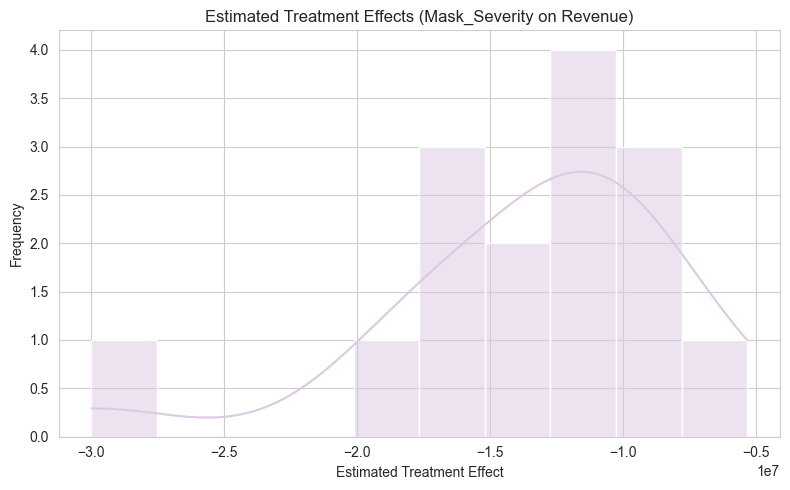

In [67]:
import pandas as pd
from econml.dml import CausalForestDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
df = combined_df.dropna()
Y = df['Revenue']
T = df['Mask_Severity']
X = df[['GDP', 'Unemployment_rate', 'Avg_Confidence', 'online_sales_%', 'Mask_Friendly']]
X = pd.get_dummies(X.join(df['Country']), drop_first=True)

# Standardise the covariates
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X_scaled, T, Y, test_size=0.2, random_state=42)

# Causal Forest Estimator
causal_forest = CausalForestDML(
    model_t=RandomForestRegressor(),
    model_y=RandomForestRegressor(),
    n_estimators=100,
    min_samples_leaf=1,
    max_depth=5,
    random_state=42
)

# Fit the model
causal_forest.fit(Y_train, T_train, X=X_train)

# Estimate treatment effects
te_pred = causal_forest.effect(X_test)

# Plotting
plt.figure(figsize=(8, 5))
sns.histplot(te_pred, bins=10, kde=True)
plt.title("Estimated Treatment Effects (Mask_Severity on Revenue)")
plt.xlabel("Estimated Treatment Effect")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Originally, I created this causal forest which shows how given all other factors stay the same, how much does an increase in mask severity change revenue. Although this graph indicates a loss in revenue of around -1.1bn for a change in mask severity, this changed frequently when i rerun the model. This indicated it was not a strong model or feature for prediction. It also does not add much addditional information to my blog. As a result, I decided not to include this. 

### 3.5 Random Forest Model

Root Mean Squared Error: 132981610.65
R² Score: 0.9346


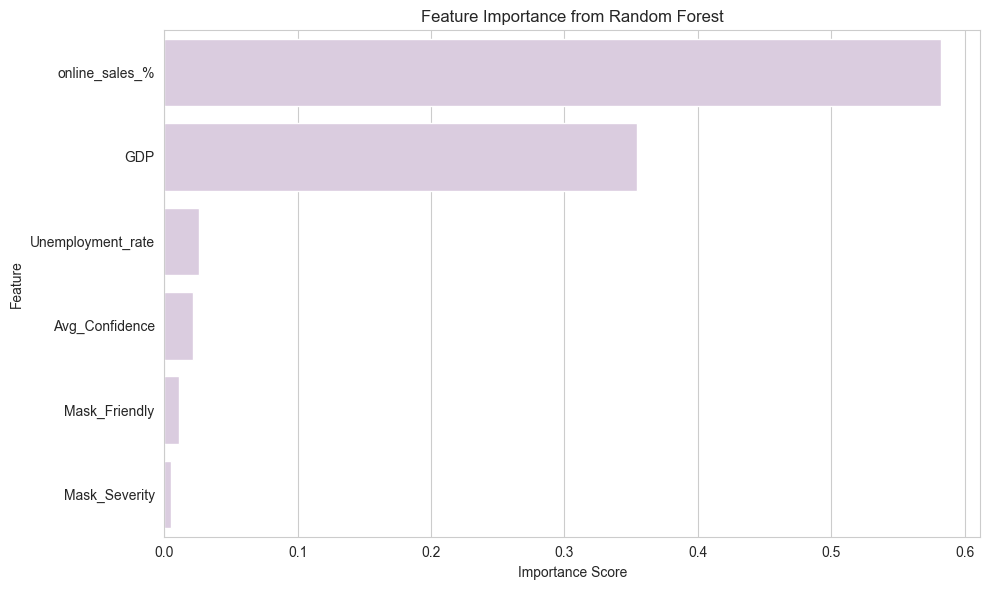

In [71]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
os.environ["PYTHONHASHSEED"] = "42"

# Define features and target
X_rf = combined_df[['GDP', 'Unemployment_rate', 'Avg_Confidence', 'online_sales_%', 'Mask_Severity', 'Mask_Friendly']]
y_rf = combined_df['Revenue']

# Train/Test split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=1)
rf_model.fit(X_train_rf, y_train_rf)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test_rf)
rmse = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
print(f"Root Mean Squared Error: {rmse:.2f}")
r2 = r2_score(y_test_rf, y_pred_rf)
print(f"R² Score: {r2:.4f}")

# Feature Importances
feature_importance = pd.Series(rf_model.feature_importances_, index=X_rf.columns).sort_values(ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

The RMSE and R^2 suggest the model is relatively accurate, given the complexity of predicting revenue and the amount of data input. This graph was more helpful for my analysis as it directed me towards which factors influence revenue the most.

### 3.6 Correlation between GDP change and revenue of the cosmetic industry

In [74]:
from sklearn.ensemble import RandomForestRegressor
# 
df['GDP_change'] = df['GDP'].diff().fillna(0)  

# Define your features (X) and target (y)
X = df[['online_sales_%', 'GDP', 'Unemployment_rate', 'Avg_Confidence', 'Mask_Friendly', 'Mask_Severity', 'GDP_change']]
y = df['Revenue']  # Assuming your target variable is 'revenue'

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get predicted revenue from the model
y_pred = rf_model.predict(X_test)

# Calculate correlation between GDP change and predicted revenue
correlation = X_test['GDP_change'].corr(pd.Series(y_pred))

print('Correlation between GDP change and predicted revenue:', correlation)


Correlation between GDP change and predicted revenue: -0.999360593795874


## 4. Further Visualisations building on advanced models

### 4.1 E-commerce

#### 4.1.1 Dataframes and data cleaning

In [ ]:
# Luxury cosmetics online/offline split dataframe 

# Import dataset
df_luxcos_onoff = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/Country_data/US/ecommerce/lux_cosmetics_US_online_offline.csv")

# Change dataframe formatting and rename
first_col = df_luxcos_onoff.columns[0]
df_luxcos_onoff.loc[[0, 1], first_col] = ["Luxury cosmetics offline sales %", "Luxury cosmetics online sales %"]
df_luxcos_onoff.rename(columns={first_col: "Channel"}, inplace=True)
df_luxcos_onoff

,Channel,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,Luxury cosmetics offline sales %,93.8,92.7,89.6,86.6,86,83.5,80.7,78,76.4,75,73.6,72.3
1,Luxury cosmetics online sales %,6.2,7.3,10.4,13.4,14,16.5,19.3,22,23.6,25,26.4,27.7


In [78]:
# Luxury fashion online/offline split dataframe 

# Import dataset
df_luxfash_onoff = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/lux_fashion_online_offline_USA.csv")

# Change dataframe formatting and rename rows
first_col = df_luxfash_onoff.columns[0]
df_luxfash_onoff.loc[[0, 1], first_col] = ["Luxury fashion offline sales %", "Luxury fashion online sales %"]
df_luxfash_onoff.rename(columns={first_col: "Channel"}, inplace=True)
df_luxfash_onoff

,Channel,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,Luxury fashion offline sales %,84,83,77.6,77.1,78.1,81.1,79.3,77.6,75.6,73.6,72,71.2
1,Luxury fashion online sales %,16,17,22.4,22.9,21.9,18.9,20.7,22.4,24.4,26.4,28,28.8


In [79]:
# Luxury leather online/offline split dataframe 

# Import dataset
df_luxleather_onoff = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/lux_leather_online_offline.csv")

# Change dataframe formatting and rename rows
first_col = df_luxleather_onoff.columns[0]
df_luxleather_onoff.loc[[0, 1], first_col] = ["Luxury leather online sales %", "Luxury leather offline sales %"]
df_luxleather_onoff.rename(columns={first_col: "Channel"}, inplace=True)
df_luxleather_onoff

,Channel,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,Luxury leather online sales %,16.5,17.4,24.7,26,29.3,31.2,34,35.4,36.2,36.6,36.7,36.6
1,Luxury leather offline sales %,83.5,82.6,75.3,74,70.7,68.8,66,64.6,63.8,63.4,63.3,63.4


In [82]:
# Mass cosmetics online/offline split dataframe 

# Import dataset
df_cos_onoff = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/cosmetics_online_offline.csv")

# Change dataframe formatting and rename rows
first_col = df_cos_onoff.columns[0]
df_cos_onoff.loc[[0, 1], first_col] = ["Cosmetics online sales %", "Cosmetics offline sales %"]
df_cos_onoff.rename(columns={first_col: "Channel"}, inplace=True)
df_cos_onoff

,Channel,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,Cosmetics online sales %,27.5,30.5,47.4,60.1,54.7,58.3,63.5,68.1,72.4,75.4,76.7,78.1
1,Cosmetics offline sales %,72.5,69.5,52.6,39.9,45.3,41.7,36.5,31.9,27.6,24.6,23.3,21.9


In [85]:
# USA country level online/offline split dataframe

# Import dataset
df_USA_onoff = pd.read_csv("/Users/kaitlinjohnson/Desktop/luxury_goods_project/data/raw_data/country_data/US/ecommerce/online_offline_USA.csv")

# Clean dataset as lots of NaN values
df_USA_onoff.columns = df_USA_onoff.iloc[2].astype(str)
df_USA_onoff = df_USA_onoff.drop(df_USA_onoff.index[:3])
df_USA_onoff = df_USA_onoff.drop(df_USA_onoff.index[2:12])
df_USA_onoff = df_USA_onoff.reset_index(drop=True)

# Sort out and rename columns
first_col = df_USA_onoff.columns[0]
df_USA_onoff.loc[[0, 1], first_col] = ["USA offline sales %", "USA online sales %"]
df_USA_onoff.columns = [str(col).replace('.0', '') for col in df_USA_onoff.columns]
df_USA_onoff.rename(columns={first_col: "Channel"}, inplace=True)
df_USA_onoff

,Channel,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
0,USA offline sales %,82.3,81.5,80.4,75.7,72.4,70.9,69.4,66.3,63.4,60.5,58.2,56.9,56.4
1,USA online sales %,17.7,18.5,19.6,24.3,27.6,29.1,30.6,33.7,36.6,39.5,41.8,43.1,43.6


In [86]:
# Channel dataframe for all the above 
channel_df = pd.concat([df_luxcos_onoff, df_luxfash_onoff,df_luxleather_onoff, df_cos_onoff, df_USA_onoff], ignore_index=True)
channel_df

,Channel,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2017
0,Luxury cosmetics offline sales %,93.8,92.7,89.6,86.6,86.0,83.5,80.7,78.0,76.4,75.0,73.6,72.3,NaN
1,Luxury cosmetics online sales %,6.2,7.3,10.4,13.4,14.0,16.5,19.3,22.0,23.6,25.0,26.4,27.7,NaN
2,Luxury fashion offline sales %,84.0,83.0,77.6,77.1,78.1,81.1,79.3,77.6,75.6,73.6,72.0,71.2,NaN
3,Luxury fashion online sales %,16.0,17.0,22.4,22.9,21.9,18.9,20.7,22.4,24.4,26.4,28.0,28.8,NaN
4,Luxury leather online sales %,16.5,17.4,24.7,26.0,29.3,31.2,34.0,35.4,36.2,36.6,36.7,36.6,NaN
5,Luxury leather offline sales %,83.5,82.6,75.3,74.0,70.7,68.8,66.0,64.6,63.8,63.4,63.3,63.4,NaN
6,Cosmetics online sales %,27.5,30.5,47.4,60.1,54.7,58.3,63.5,68.1,72.4,75.4,76.7,78.1,NaN
7,Cosmetics offline sales %,72.5,69.5,52.6,39.9,45.3,41.7,36.5,31.9,27.6,24.6,23.3,21.9,NaN
8,USA offline sales %,81.5,80.4,75.7,72.4,70.9,69.4,66.3,63.4,60.5,58.2,56.9,56.4,82.3
9,USA online sales %,18.5,19.6,24.3,27.6,29.1,30.6,33.7,36.6,39.5,41.8,43.1,43.6,17.7


In [87]:
# Create online dataframe 
online_df = channel_df[channel_df['Channel'].str.contains('online sales %', case=False)]
online_df = online_df[['Channel', '2019', '2020', '2021', '2022']]
online_df

,Channel,2019,2020,2021,2022
1,Luxury cosmetics online sales %,7.3,10.4,13.4,14.0
3,Luxury fashion online sales %,17.0,22.4,22.9,21.9
4,Luxury leather online sales %,17.4,24.7,26.0,29.3
6,Cosmetics online sales %,30.5,47.4,60.1,54.7
9,USA online sales %,19.6,24.3,27.6,29.1


#### 4.1.2 Online sales plot

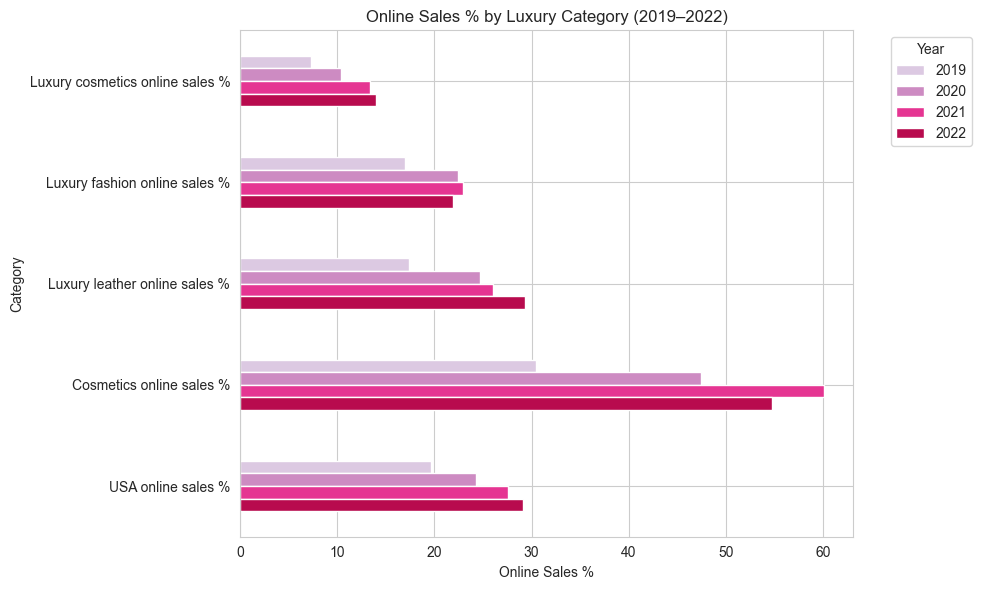

In [88]:
# Choose colours to fit theme
colors = sns.color_palette("PuRd", n_colors=4)
sns.set_palette(colors)

# Create axis and index
fig, ax = plt.subplots(figsize=(10, 6))
online_df.set_index('Channel').plot(kind='barh', ax=ax)

# Add labels and legends
ax.set_xlabel('Online Sales %')
ax.set_ylabel('Category')
ax.set_title('Online Sales % by Luxury Category (2019–2022)')
ax.invert_yaxis()  
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot
plt.tight_layout()
plt.show()

### 4.2 Mask Mandates